# Automated Truss Solver

In class we have talked about trusses and how to solve for the forces in the elements of the truss using either the method of joints or the method of sections. The method of joints is particularly amenable for computer implementation and that's the goal of this iPython notebook

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Truss Representation: Mesh and Boundary Conditions

We first need to define or parameterize a truss. Before doing so, let's take a look at a method to solve mechanics problems called 'Finite Element Analysis' (FEA). FEA is most often used to solve mechanical equilibrium of materials, which is the topic of ME323. The solution process consists of splitting the domain into pieces or 'elements' and setting up the equation of equilibrium for each of these elements as they interact with their neighbors. Then all the equations are put together to solve for the forces and deformations of each element. The most basic type of 'finite element' is a truss member! 

Thus, to parameterize a truss we will use a very similar approach to what we did for the centroid assingment. We need a truss 'mesh'. In other words we need a list of 'nodal coordinates' which contains the location of the pin joints, and a list of 'element connectivity'. Each element of the truss is specified by connecting two joints (or nodes). 

In addition to the geometry, we must specify a joint with a fixed support and a joint with a roller support. This is formally known as 'boundary condition'. Finally, we must also specify the loading. For a given node, which force is being applied. A sample file is provided.

In [2]:
## Reading in the mesh

# open the file and read in the lines
filename = 'truss_areaExamF18.txt'
filelines = open(filename,'r').readlines()

# second line has the number of nodes (or pin joints)
n_nodes = int(filelines[1])

# read the nodes and store them in an array
nodes = np.zeros((n_nodes,2)) # this creates the array, each node has 2 coords
for i in range(n_nodes):
    aux = filelines[i+2].split(' ')
    nodes[i,0] = float(aux[0])
    nodes[i,1] = float(aux[1])
# two lines ahead is the number of elements (truss members)
n_members = int(filelines[n_nodes+3]) 
members = np.ndarray((n_members,2),dtype = int) # each member is defined by 2 nodes
for i in range(n_members):
    aux = filelines[i+n_nodes+4].split(' ')
    members[i,0] = int(aux[0])
    members[i,1] = int(aux[1])
    
# read the boundary conditions (which joint has a fixed support and which one has a roller)
BC_fixed = int(filelines[n_nodes+n_members+5])
BC_roller = int(filelines[n_nodes+n_members+7])

# read the loads, first the number of loads
n_loads = int(filelines[n_nodes+n_members+9])
# then the loads which are specified by the node at which the load is acting
# and the vector force
loads = np.zeros((n_loads,3))
for i in range(n_loads):
    aux = filelines[n_nodes+n_members+10+i].split(' ')
    loads[i,0] = float(aux[0]) # the node at which the load is acting
    loads[i,1] = float(aux[1]) # the x component of the load
    loads[i,2] = float(aux[2]) # the y component of the load

To compute the equations we will have to loop over the joints and get the members that are concurrent at that joint, thus we need to create a new structure with that information

In [3]:
## Creating an array that has, for each node, the elements that are concurrent at that node
max_valence = 6 # the maximum number of elements that are concurrent at a single node
joints = -1*np.ones((n_nodes,max_valence))
# loop over elements
for i in range(n_members):
    # for each element fill in the corresponding entry in the joints array
    # first find the first node of that member and change one of the joint rows
    for j in range(max_valence):
        if joints[members[i,0],j]==-1:
            joints[members[i,0],j] = i
            break
    # then find the second node of the element and change the joints array
    for j in range(max_valence):
        if joints[members[i,1],j]==-1:
            joints[members[i,1],j] = i
            break
            


In [4]:
print('nodal coordinates')
print(nodes)
print('members')
print(members)
print('joints')
print(joints) ## the new array I just created, not in the file
print('boundary conditions')
print(BC_fixed)
print(BC_roller)
print('loads')
print(loads)


nodal coordinates
[[ 0.  0.]
 [ 0.  1.]
 [ 1.  2.]
 [ 2.  2.]
 [ 3.  1.]
 [ 3.  0.]]
members
[[0 1]
 [0 2]
 [1 2]
 [1 3]
 [2 3]
 [2 4]
 [3 4]
 [3 5]
 [4 5]]
joints
[[ 0.  1. -1. -1. -1. -1.]
 [ 0.  2.  3. -1. -1. -1.]
 [ 1.  2.  4.  5. -1. -1.]
 [ 3.  4.  6.  7. -1. -1.]
 [ 5.  6.  8. -1. -1. -1.]
 [ 7.  8. -1. -1. -1. -1.]]
boundary conditions
0
5
loads
[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 3.  0. -2.]
 [ 4.  0. -1.]]


## Plotting Truss Geometry

(-1.5, 3.1)

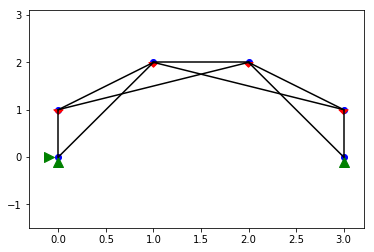

In [5]:
## Plot the truss 
for i in range(n_members):
    plt.plot([nodes[members[i,0],0],nodes[members[i,1],0]],[nodes[members[i,0],1],nodes[members[i,1],1]],color='black')
plt.scatter(nodes[:,0],nodes[:,1],color='blue')
vectorBC1 = [nodes[BC_fixed,0]-0.1,nodes[BC_fixed,1]-0.1,nodes[BC_fixed,0],nodes[BC_fixed,1]]
plt.scatter(nodes[BC_fixed,0]-0.1,nodes[BC_fixed,1],marker='>',color='green',s=100)
plt.scatter(nodes[BC_fixed,0],nodes[BC_fixed,1]-0.1,marker='^',color='green',s=100)
plt.scatter(nodes[BC_roller,0],nodes[BC_roller,1]-0.1,marker='^',color='green',s=100)
for i in range(n_loads):
    plt.arrow(nodes[int(loads[i,0]),0],nodes[int(loads[i,0]),1],loads[i,1],loads[i,2]/450,
             head_width=0.1,head_length=0.1,color='red')
plt.ylim((-1.5,3.1))

## Static Determinancy 

We need to check that the truss satisfies the required condition for being statically determinate in order to be sure that we can solve it.

NOTE: even if the truss satisfies this equation it can still be statically indeterminate
this is a necessary but not a sufficient condition. 

Please refer to your notes for this part of the code.

In [6]:
## Check that truss is statically determinate

condition =  ## Your code here ##

if condition>0:
    print("your text here")
elif condition<0:
    print("your text here")
else:
    print("your text here")
        

SyntaxError: invalid syntax (<ipython-input-6-cbd24955dc52>, line 3)

## Method of Joints: Assembling a Linear System

The method of joints consists of assembling a linear system of equations, or, in other words, filling a matrix A and a vector b and solving the matrix equation Ax = b, where x is the solution vector. 

In our case, x is the vector with all the member forces and the reactions at the fixed support and roller support. Thus, x is a vector of size n_members + 3. 

Each row of the matrix A is one equation. We have two equations per joint (sum Fx=0, sumFy=0), so A must have dimensions 2\*n_nodes X (n_members+3). To get a unique solution of Ax =b, A needs to be a square matrix. Hopefully now you see why we need to check the condition for static determinancy. 

Since each equation is sum Fx = 0, sum Fy = 0 for each joint, then the vector b is a vector of 2\*n_nodes with the negative of the external loads

The goal of our code is then to fill out matrix A


In [ ]:
## Filling out matrix A

A = np.zeros((2*n_nodes,n_members+3)) # initializes A

# loop over joints, remember, each row of A is one equation, each joint gives us 2 equations
# each column of the matrix A is associated to an unknown, namely all the member forces and
# the reactions from the ground. The fixed support reaction forces are the third to last and
# second to last columns while the roller support reaction force is the last column
for i in range(n_nodes):
    # for each joint loop over the elements concurrent at the joint
    for j in range(max_valence):
        
        # max_valence is the maximum number of members that are at a joint, but there
        # could be less, so if we find a -1 we break the loop
        if joints[i,j]<0:
            break
        
        ## For each element add the corresponding entries to the matrix A
        # remember that each element will contribute to two equations, sum Fx, and sum Fy
        # and therefore to two rows of A
        
        # sum Fx = 0
        A[i*2+0,int(joints[i,j])] = ## Your code here (probably needs code before also) ## 
        
        # sum Fy = 0
        A[i*2+1,int(joints[i,j])] = ## Your code here (probably needs code before also) ## 
        
    ## Check if this node has ground reactions
    
    # if this node has the fixed support then the equation corresponding to this node
    # has to take the corresponding x and y reactions into consideration
    if i==BC_fixed:
        # for sum Fx = 0
        A[i*2+0,n_members] = ## Your code here ##
        # for sum Fy = 0
        A[i*2+1,n_members+1] = ## Your code here ##
        
    # if this node has the roller support
    if i==BC_roller:
        A[i*2+1,n_members+2] ## Your code here ##
        

Now we can create the right hand side which has the external loads, and then solve for x

In [70]:
# Right hand side is initialized with zeros
b = np.zeros((2*n_nodes))
# then filled with the negative of the loads
for i in range(n_loads):
    ## Your code here ##
    
# Solve 
x = np.linalg.solve(A,b)

## Results 

We can plot the results and also print the results to the screen

In [ ]:
# Creating a heat map, the array mycmap is a list of colors
n_contours = 50 # the size of the 'heat map' array
mycmap = matplotlib.cm.get_cmap('jet', n_contours)  

# First, assign to each member a color index according to the force
member_color_index = np.ndarray((n_members),dtype = int)
max_tension_force = ## Your code here ##
max_compression_force = ## Your code here ##

# Loop over the members and, based on their force relative to the max tension and
# compression, determine the index value. For example, if we want 50 countours then 
# the index number 25 corresponds to 0, the index 50 is maximum tension, and the nidex 0
# is for maximum compression
for i in range(n_members):
    member_color[i] = ## Your code here ##

for i in range(n_members):
    plt.plot([nodes[members[i,0],0],nodes[members[i,1],0]],[nodes[members[i,0],1],nodes[members[i,1],1]],
             color=mycmap(member_color[i])
plt.scatter(nodes[:,0],nodes[:,1],color='blue')
vectorBC1 = [nodes[BC_fixed,0]-0.1,nodes[BC_fixed,1]-0.1,nodes[BC_fixed,0],nodes[BC_fixed,1]]
plt.scatter(nodes[BC_fixed,0]-0.1,nodes[BC_fixed,1],marker='>',color='green',s=100)
plt.scatter(nodes[BC_fixed,0],nodes[BC_fixed,1]-0.1,marker='^',color='green',s=100)
plt.scatter(nodes[BC_roller,0],nodes[BC_roller,1]-0.1,marker='^',color='green',s=100)
for i in range(n_loads):
    plt.arrow(nodes[int(loads[i,0]),0],nodes[int(loads[i,0]),1],loads[i,1],loads[i,2]/450,
             head_width=0.1,head_length=0.1,color='red')
plt.ylim((-1.5,3.1))
